**INET 4061 Lab 3**

**Omar Porte**

**2/4/2021**


# Overview

The business problem that we are trying to solve is wether or not there is a
statistical difference that age and race have on voting. In order to find
an answer, we will be utilizing the one-way ANOVA test. 

**one-way ANOVA:** used to test if the mean of a variable is different accross all of the levels of one variable.

**F-test:** it is used to tell us if the standard deviations from two data sets differ statistically. 

**F-statistic:** if the value is big then there is a low possibility that our null hypothesis is correct. If the number is small then it is more likely that our null hypothesis is correct. bigger value: more variation between the sets of samples. lower value: more variation within the sets of the samples.

**Bonferroni correction:** an adjustment made when doing many t-tests to make up for the increased chance of comming up with significant values. This is done by dividing the statistical significance level by the number of comparisons that are being made. This value will be used to compare the pvalues to and any values equal to or less than the new significance level will be considered significant.

**Why use Tukey's test?:** Using Tukey's test is a great option becuase not only does it not leave out some significant values like the other options, it also provides more indepth data. It provides a confidence interval that lets you know wether or not to reject the null hypothesis for each pair and it shows the average differences.

**What we are doing:** We are taking voter age and race data and testing wether there is any significant difference between the means of each demographic.  



**References**

1. http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html

2. https://www.khanacademy.org/math/statistics-probability/analysis-of-variance-anova-library/analysis-of-variance-anova/v/anova-3-hypothesis-test-with-f-statistic

3. https://www.youtube.com/watch?v=FlIiYdHHpwU&ab_channel=LucilleBenedict

# Data (1)

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


np.random.seed(12)

races =   ["asian","black","hispanic","other","white"]

# Generate random data
voter_race = np.random.choice(a= races, p = [0.05, 0.15 ,0.25, 0.05, 0.5], size=1000)

voter_age = stats.poisson.rvs(loc=18, mu=30,size=1000)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups

# Etract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# EDA (1)

In [2]:
voter_frame

,race,age
0,black,51
1,white,49
2,hispanic,51
3,white,48
4,asian,56
...,...,...
995,white,47
996,asian,40
997,white,50
998,white,51


The voter_frame DataFrame has 2 columns and 1000 rows

In [3]:
type(groups)

pandas.io.formats.printing.PrettyDict

In [4]:
groups.values()

dict_values([Int64Index([  4,   7,  14,  21,  49,  53,  59,  78,  95,  98, 135, 136, 162,
            203, 227, 264, 278, 289, 326, 335, 345, 373, 430, 480, 484, 491,
            516, 587, 602, 684, 692, 708, 715, 761, 776, 826, 828, 832, 853,
            897, 942, 951, 986, 996],
           dtype='int64'), Int64Index([  0,   9,  19,  22,  23,  42,  50,  56,  62,  76,
            ...
            948, 956, 961, 965, 968, 972, 982, 984, 989, 990],
           dtype='int64', length=147), Int64Index([  2,  10,  24,  28,  31,  32,  38,  40,  44,  45,
            ...
            954, 955, 958, 959, 962, 964, 966, 974, 994, 999],
           dtype='int64', length=244), Int64Index([ 17,  26,  39,  46,  48,  65,  67,  72, 146, 237, 246, 255, 284,
            302, 317, 322, 358, 370, 386, 413, 425, 446, 530, 542, 569, 571,
            573, 575, 583, 626, 629, 637, 662, 696, 700, 701, 728, 739, 756,
            757, 773, 813, 819, 880, 923, 936, 939, 971, 980, 992],
           dtype='int64'), Int64

In [5]:
groups.keys()

dict_keys(['asian', 'black', 'hispanic', 'other', 'white'])

The groups var is a dictionary where the keys are the races and the values are a list of all the ages associated with them.

In [6]:
voter_frame.describe()

,age
count,1000.000000
mean,47.773000
std,5.308074
min,34.000000
25%,44.000000
50%,48.000000
75%,51.000000
max,66.000000


The avereage age is 47.77 years, the standard deviation from the average age is 5.31 years, the min age is 34 years, and the max age is 66 years.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0316686b70>]],
      dtype=object)

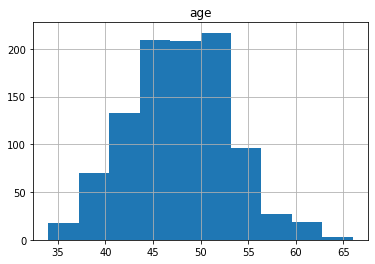

In [7]:
voter_frame.hist()

# Models

In [8]:
# oneway ANOVA

stats.f_oneway(asian, black, hispanic, other, white)


F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

The statistic is an F statistic that gets compared to the F distribution and the pvalue is the evidence against the null hypothesis. Since the p value is high (> 0.05) it is not significant enough to reject the null hypothesis (there is no diffenece between the different means).

In [9]:
# t test with Bonferroni correction

race_pairs = []

for race1 in range(4):
    for race2  in range(race1+1,5):
        race_pairs.append((races[race1], races[race2]))

# Conduct t-test on each pair
for race1, race2 in race_pairs: 
    print(race1, race2)
    print(stats.ttest_ind(voter_age[groups[race1]], 
                          voter_age[groups[race2]]))    

asian black
Ttest_indResult(statistic=1.4723166654510063, pvalue=0.14259864916065687)
asian hispanic
Ttest_indResult(statistic=0.7952576949464497, pvalue=0.42712310624411387)
asian other
Ttest_indResult(statistic=0.023943564194904926, pvalue=0.9809494819541007)
asian white
Ttest_indResult(statistic=1.7847665455760953, pvalue=0.07484331440702094)
black hispanic
Ttest_indResult(statistic=-0.9779887872139286, pvalue=0.328687679434698)
black other
Ttest_indResult(statistic=-1.537940275215305, pvalue=0.12568427083007871)
black white
Ttest_indResult(statistic=0.1754225782292794, pvalue=0.860801405242227)
hispanic other
Ttest_indResult(statistic=-0.8181367221979297, pvalue=0.41394624196541574)
hispanic white
Ttest_indResult(statistic=1.5959271355589721, pvalue=0.11092241932285327)
other white
Ttest_indResult(statistic=1.866874647450789, pvalue=0.06243863321791571)


The pvalue for each of the reace pairs is not significantly low (< 0.005) so there is no reason to reject the null hypothesis

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


group1,group2,meandiff,p-adj,lower,upper,reject
asian,black,-1.3353,0.5735,-3.8242,1.1535,False
asian,hispanic,-0.7593,0.9,-3.1315,1.6129,False
asian,other,-0.0264,0.9,-3.0202,2.9674,False
asian,white,-1.4184,0.4336,-3.6932,0.8564,False
black,hispanic,0.576,0.8145,-0.9362,2.0882,False
black,other,1.309,0.5494,-1.0622,3.6801,False
black,white,-0.0831,0.9,-1.4374,1.2713,False
hispanic,other,0.733,0.8996,-1.5154,2.9813,False
hispanic,white,-0.6591,0.4974,-1.7847,0.4665,False
other,white,-1.392,0.3912,-3.5374,0.7533,False


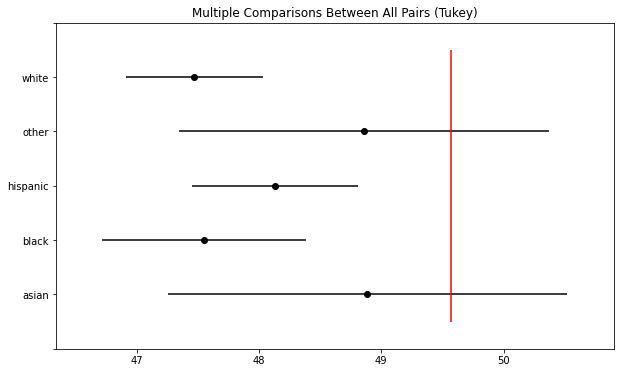

In [10]:
# Tukey test

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=voter_age, groups=voter_race, alpha=0.05)  

tukey.plot_simultaneous()    
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()  

The tukey summary shows that none of the pvalues for any of these pairs are significant enough to reject the null hypothesis. The chart also furthers this point. All of the confidence intervals overlap, meaning it is not for sure that any of the groups differ enough to reject the null hypothesis.

# Data (2)

In [11]:
np.random.seed(12)

# Generate random data
voter_race = np.random.choice(a= races, p = [0.05, 0.15 ,0.25, 0.05, 0.5], size=1000)

# Use a different distribution for white ages
white_ages = stats.poisson.rvs(loc=18, mu=32, size=1000)

voter_age = stats.poisson.rvs(loc=18, mu=30, size=1000)

voter_age = np.where(voter_race=="white", white_ages, voter_age)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups   

# Extract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]



# EDA (2)

In [12]:
voter_frame.groupby('race').describe()

age                                                   
          count       mean       std   min   25%   50%   75%   max
race                                                              
asian      44.0  48.204545  4.925395  39.0  45.0  47.0  51.0  59.0
black     147.0  47.401361  5.750116  35.0  43.0  47.0  51.0  67.0
hispanic  244.0  48.618852  6.100514  32.0  45.0  48.0  53.0  72.0
other      50.0  47.140000  5.532870  29.0  44.0  48.0  50.0  59.0
white     515.0  50.159223  5.404088  36.0  47.0  50.0  54.0  69.0



1.   Asian has the least amount of people (44)
2.   White has the most amount of people (515)
3.   All the races have a mean age between 47 and 50.2
4.   Hispanic has the oldest age (72)
5.   Hispanic has the highest std from the mean age (6.1)
6.   Asian has the lowes std from the mean age (4.92)
7.   Asian has the youngest age (59)



# Models (2)

In [13]:
# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)

The pvalue is significantly low (< 0.05) so we are going to reject the null hypothesis.

In [14]:
# t test with Bonferroni correction

race_pairs = []

for race1 in range(4):
    for race2  in range(race1+1,5):
        race_pairs.append((races[race1], races[race2]))

# Conduct t-test on each pair
for race1, race2 in race_pairs: 
    print(race1, race2)
    print(stats.ttest_ind(voter_age[groups[race1]], 
                          voter_age[groups[race2]]))

asian black
Ttest_indResult(statistic=0.838644690974798, pvalue=0.4027281369339345)
asian hispanic
Ttest_indResult(statistic=-0.42594691924932293, pvalue=0.6704669004240726)
asian other
Ttest_indResult(statistic=0.9795284739636, pvalue=0.3298877500095151)
asian white
Ttest_indResult(statistic=-2.318108811252288, pvalue=0.020804701566400217)
black hispanic
Ttest_indResult(statistic=-1.9527839210712925, pvalue=0.05156197171952594)
black other
Ttest_indResult(statistic=0.28025754367057176, pvalue=0.7795770111117659)
black white
Ttest_indResult(statistic=-5.379303881281835, pvalue=1.039421216662395e-07)
hispanic other
Ttest_indResult(statistic=1.5853626170340225, pvalue=0.11396630528484335)
hispanic white
Ttest_indResult(statistic=-3.5160312714115376, pvalue=0.0004641298649066684)
other white
Ttest_indResult(statistic=-3.763809322077872, pvalue=0.00018490576317593065)


The pvalues that show significance are the (asian, white), (black, white), (hispanic, white), and (other, white) pairs. All of these pairs have a significantly low pvalue, but with the Bonferroni correction they must be < 0.005 (.05/10 = 0.005). The only two pairs that apply to this are (hispanic, white) and (other, white).

group1,group2,meandiff,p-adj,lower,upper,reject
asian,black,-0.8032,0.9,-3.4423,1.836,False
asian,hispanic,0.4143,0.9,-2.1011,2.9297,False
asian,other,-1.0645,0.8852,-4.2391,2.11,False
asian,white,1.9547,0.175,-0.4575,4.3668,False
black,hispanic,1.2175,0.2318,-0.386,2.821,False
black,other,-0.2614,0.9,-2.7757,2.253,False
black,white,2.7579,0.001,1.3217,4.194,True
hispanic,other,-1.4789,0.4391,-3.863,0.9053,False
hispanic,white,1.5404,0.004,0.3468,2.734,True
other,white,3.0192,0.0028,0.7443,5.2941,True


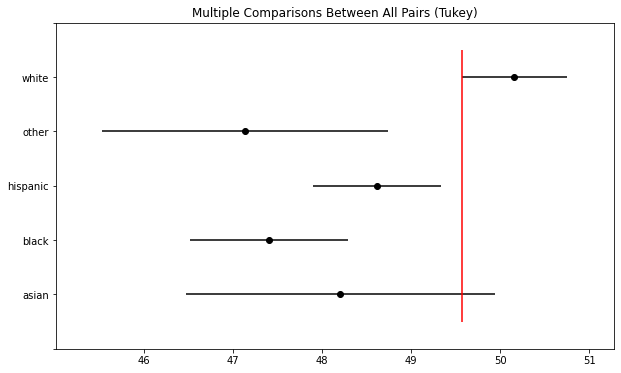

In [15]:
# Tukey test

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=voter_age, groups=voter_race, alpha=0.05)  

tukey.plot_simultaneous()    
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()  

The tukey summary shows that only 3 pairs are significant enought to reject the null hypothesis. The  3 pairs are (black, white), (hispanic, white), and (other, white). The chart also futhers this point, but it also shows why the pair (asian, white) was not significant enough to reject the null hypothesis. The confidence interval of the white group over laps the confidence interval of the asian group. This means that they could possibly have the same value there for not rejecting the null hypothesis. 

# Conclusions

What we can conclude from this ANOVA analysis is that the only group that is significantly different from the rest is the white group. The white group is closest to the asian group and furthest from the black group.